In [1]:
from atlite.datasets.era5 import retrieve_data, _rename_and_clean_coords, retrieval_times, _area
import xarray as xr
import atlite
import logging
import cdsapi
import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
from cartopy.io import shapereader
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO)

import numpy as np
import pandas as pd

import pgeocode      
import seaborn as sns

import scipy.sparse as sp
from collections import OrderedDict
%matplotlib inline
import requests
import os
# Removing facets warning: 
os.environ['ESGF_PYCLIENT_NO_FACETS_STAR_WARNING']='1'
import zipfile
import datetime

from matplotlib.gridspec import GridSpec
from atlite.gis import shape_availability, ExclusionContainer
from rasterio.plot import show

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Defining figure size for maps:
map_fig_size = (10,10)

In [2]:
# from countrygroups import EUROPEAN_UNION

# # Adding non-EU countries to the list of countries
# #others = (["Switzerland","Czech Republic", "Ukraine","Moldova", "Serbia","Albania", "United Kingdom", 
# #           "Montenegro","Bosnia and Herzegovina","North Macedonia","Kosovo","Norway"])
# others = (["Switzerland","Czech Republic", "Serbia","Albania", "United Kingdom", 
#            "Montenegro","Bosnia and Herzegovina","North Macedonia","Kosovo","Norway"])
# europe_list = EUROPEAN_UNION.names + others
# europe_list.remove("Czechia")
# europe_list.sort()
# # list_df = pd.DataFrame(europe_list).set_index(0)
# # list_df.to_csv('europe_list.csv')

# # Saving europe_list to file: 
# file = open('europe_list.txt','w')
# for item in europe_list:
# 	file.write(item+"\n")
# file.close()

In [3]:
# Loading europe_list from txt file: 

with open('europe_list.txt', 'r') as file:
    # Create an empty list to store the lines
    europe_list = []

    # Iterate over the lines of the file
    for line in file:
        # Remove the newline character at the end of the line
        line = line.strip()

        # Append the line to the list
        europe_list.append(line)
# europe_list

c:\Users\c10si\anaconda3\envs\Pre-project_environment_2_20230\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


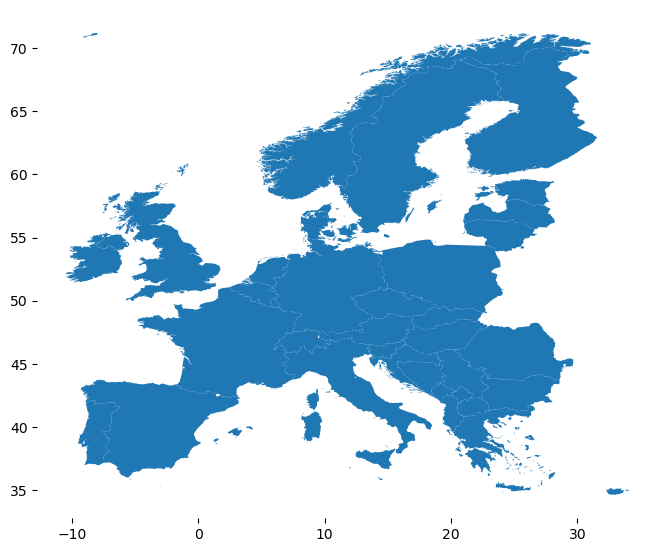

In [4]:
# Defining shape of European countries

shpfilename = shapereader.natural_earth(
    resolution="10m", category="cultural", name="admin_0_countries"
)
reader = shapereader.Reader(shpfilename)
Europe = gpd.GeoSeries(
    {r.attributes["NAME_EN"]: r.geometry for r in reader.records()},
    crs={"init": "epsg:4326"},
#).reindex(["Austria","Denmark","Germany","Italy"])
).reindex(europe_list)

# Removing extra territories (islands in the Atlantic, etc.)
mask = (-11, 30, 50, 74)
Europe = Europe.clip(mask)
Europe.plot(figsize=(8,8),aspect='equal').set_frame_on(False)

In [5]:
bounds = Europe.unary_union.buffer(1).bounds

# Downloading .NC files for 2015-2022

In [6]:
# esgf_params = {
#    'data_node': 'esgf-cnr.hpc.cineca.it',
#    'source_id': 'EC-Earth3',
#    'variant_label':'r4i1p1f1',
#    'experiment_id': 'ssp126',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }

# Europe_EC_Earth3_15_22 = atlite.Cutout(path='Europe_EC_Earth3_15_22.nc',
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice("2015-01-01", "2022-12-31"),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)
# Europe_EC_Earth3_15_22.prepare()

In [7]:
# esgf_params = {
#    'data_node': 'esgf.ceda.ac.uk',
#    'source_id': 'HadGEM3-GC31-LL',
#    'variant_label':'r1i1p1f3',
#    'experiment_id': 'ssp126',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# # Define cutout time duration: 
# start_date = "2015-01-01"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'
# # Define filepath to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'
# print(f'Saving cutout to "{filepath}"')

# Europe_HadGEM3_GC31_LL_15_22 = atlite.Cutout(path=filepath,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)
# Europe_HadGEM3_GC31_LL_15_22.prepare()

In [8]:
# esgf_params = {
#    'data_node': 'esgf.ceda.ac.uk',
#    'source_id': 'HadGEM3-GC31-MM',
#    'variant_label':'r1i1p1f3',
#    'experiment_id': 'ssp126',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }

# Europe_HadGEM3_GC31_MM_15_22 = atlite.Cutout(path='Europe_HadGEM3_GC31_MM_15_22.nc',
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice("2015-01-01", "2022-12-31"),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)
# Europe_HadGEM3_GC31_MM_15_22.prepare();

In [9]:
# esgf_params = {
#    'data_node': 'esgf-cnr.hpc.cineca.it',
#    'source_id': 'EC-Earth3',
#    'variant_label':'r4i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr']
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare()

In [10]:
# esgf_params = {
#    'data_node': 'esgf-data02.diasjp.net',
#    'source_id': 'MIROC6',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp245',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}"to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [11]:
# esgf_params = {
#    'data_node': 'esgf-data02.diasjp.net',
#    'source_id': 'MIROC6',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp245',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# # Define cutout time duration: 
# start_date = "2015-06-01"
# end_date = "2015-06-03"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_testing_resolution.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}"to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H')

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature'])

In [12]:
# Testing plotting MIROC6 cutout with fine grid
# cutout_name = f'Europe_MIROC6_ssp245_{yy_start}_{yy_end}'
# locals()[cutout_name].data['wnd10m']

# projection = ccrs.Orthographic(10, 35)
# fig, ax = plt.subplots(subplot_kw={"projection": projection},figsize=(8,8), layout='constrained')
# locals()[cutout_name].data['wnd10m'].mean(dim=["time"],keep_attrs=True).plot(ax=ax,cmap="Reds",transform=plate(),cbar_kwargs={'shrink': 0.8, 'aspect': 40});
# Europe.plot(ax=ax, edgecolor='k', transform=plate(),color="None", aspect="equal",linewidth=0.3).set_frame_on(False)
# fig.suptitle(f'Mean wind speed at 10 m for MIROC6');
# fig.tight_layout;

In [13]:
# esgf_params = {
#    'data_node': 'esgf-data02.diasjp.net',
#    'source_id': 'MIROC6',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp370',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}"to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [14]:
# esgf_params = {
#    'data_node': 'esgf3.dkrz.de',
#    'source_id': 'MPI-ESM1-2-LR',
#    'variant_label':'r10i1p1f1',
#    'experiment_id': 'ssp126',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr']
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'
# # Define filepath to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'
# print(f'Saving cutout to "{filepath}"')

# locals()[cutout_name] = atlite.Cutout(
#                            #  path=filepath,
#                             path=filename,  # Use this only if you want to store cutout in the same folder as this code.
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [15]:
# esgf_params = {
#    'data_node': 'esgf3.dkrz.de',
#    'source_id': 'MPI-ESM1-2-LR',
#    'variant_label':'r10i1p1f1',
#    'experiment_id': 'ssp245',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr']
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [16]:
# esgf_params = {
#    'data_node': 'esgf3.dkrz.de',
#    'source_id': 'MPI-ESM1-2-LR',
#    'variant_label':'r10i1p1f1',
#    'experiment_id': 'ssp370',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr']
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [17]:
# esgf_params = {
#    'data_node': 'esgf-node2.cmcc.it',
#    'source_id': 'CMCC-CM2-SR5',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    # 'frequency': ['3hr', '6hr'], 
#    'frequency': '3hr',
# }
# # Define cutout time duration: 
# # start_date = "2015-01-01"
# # end_date = "2022-12-31"

# start_date = "2019-07-01"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),
#                                       esgf_params=esgf_params,dt='3H',dx=1,dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [18]:
# esgf_params = {
#    'data_node': 'esgf.ceda.ac.uk',
#    'source_id': 'CMCC-ESM2',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp126',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [19]:
# esgf_params = {
#    'data_node': 'esgf.dwd.de',
#    'source_id': 'MPI-ESM1-2-HR',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr'], 
# }
# # Define cutout time duration: 
# start_date = "2015-01-01"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [20]:
# esgf_params = {
#    'data_node': 'esgf-data03.diasjp.net',
#    'source_id': 'MRI-ESM2-0',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp126',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr'], 
# }
# # Define cutout time duration: 
# start_date = "2015-01-01"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [22]:
# esgf_params = {
#    'data_node': 'esgdata.gfdl.noaa.gov',
#    'source_id': 'GFDL-ESM4',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr'], 
# }
# # Define cutout time duration: 
# start_date = "2015-01-02"
# end_date = "2022-12-31"

# yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
# yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}.nc'

# # Define custom filepath where to save the cutout:
# filepath = f'E://Cutout/CMIP6_BOC/{filename}'

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(
#                             path=path,
#                             module="cmip",
#                             bounds = bounds,
#                             time=slice(start_date, end_date),
#                             esgf_params=esgf_params,
#                             dt='3H',dx=1, dy=1)

# locals()[cutout_name].prepare(features=['influx', 'temperature'])

# Downloading cutouts for EOC

In [23]:
# Define cutout time duration: 
start_date = "2070-01-01"
end_date = "2099-12-31"
yy_start = datetime.datetime.strptime(start_date,"%Y-%m-%d").year-2000
yy_end = datetime.datetime.strptime(end_date,"%Y-%m-%d").year-2000

In [25]:
# esgf_params = {
#    'data_node': 'esgdata.gfdl.noaa.gov',
#    'source_id': 'GFDL-ESM4',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr'], 
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['influx', 'temperature'])

In [26]:
# esgf_params = {
#    'data_node': 'esgf-cnr.hpc.cineca.it',
#    'source_id': 'EC-Earth3',
#    'variant_label':'r4i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr']
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [27]:
# esgf_params = {
#    'data_node': 'esgf.dwd.de',
#    'source_id': 'MPI-ESM1-2-HR',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr'], 
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [28]:
# esgf_params = {
#    'data_node': 'esgf3.dkrz.de',
#    'source_id': 'MPI-ESM1-2-LR',
#    'variant_label':'r10i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency': ['3hr', '6hr']
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature'])

In [29]:
# esgf_params = {
#    'data_node': 'esgf-data02.diasjp.net',
#    'source_id': 'MIROC6',
#    'variant_label':'r1i1p1f1',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature', 'runoff'])

In [30]:
# esgf_params = {
#    'data_node': 'esgf.ceda.ac.uk',
#    'source_id': 'HadGEM3-GC31-LL',
#    'variant_label':'r1i1p1f3',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature'])

In [31]:
# esgf_params = {
#    'data_node': 'esgf.ceda.ac.uk',
#    'source_id': 'HadGEM3-GC31-MM',
#    'variant_label':'r1i1p1f3',
#    'experiment_id': 'ssp585',
#    'project' : 'CMIP6',
#    'frequency':'3hr'
# }
# source_id = esgf_params["source_id"].replace("-", "_")
# cutout_name = f'Europe_{source_id}_{esgf_params["experiment_id"]}_{yy_start}_{yy_end}'
# filename = f'{cutout_name}.nc'
# filepath = f'E://Cutout/CMIP6_EOC/{filename}'     # Define custom filepath where to save the cutout:

# # Choose where to save the cutout: 
# path = filename      # Saving to local folder
# # path = filepath      # Saving to external drive

# if path == filepath:
#     print(f'Saving cutout to "{filepath}"')
# else:
#    print(f'Saving cutout "{filename}" to local folder.')

# locals()[cutout_name] = atlite.Cutout(path=path,module="cmip",bounds = bounds,time=slice(start_date, end_date),esgf_params=esgf_params,dt='3H',dx=1, dy=1)
# locals()[cutout_name].prepare(features=['wind', 'influx', 'temperature'])

Several frequencies requested - searching for tas at a frequencies of ['3hr', '6hr']
tas found at frequency of 3hr
Several frequencies requested - searching for rsds at a frequencies of ['3hr', '6hr']
rsds found at frequency of 3hr
